# Setup Environment 

In [7]:
# pip install opencv-python

In [8]:
# pip install matplotlib

In [9]:
# pip install tensorflow

In [10]:
# pip install scipy

In [11]:
# pip install scikit-learn

# Import Library

In [1]:
import os
import cv2
import random
import shutil
import string
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing

### Convert Image to Grayscale

In [2]:
# Fungsi untuk konversi gambar RGB ke grayscale
def rgb_to_gray(input_path, output_path):
    # Baca gambar
    image = cv2.imread(input_path)
    # Konversi ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Simpan gambar grayscale
    cv2.imwrite(output_path, gray_image)

# Fungsi untuk melakukan konversi pada semua gambar dalam folder
def convert_images_in_folder(folder_path, output_folder_path):
    # Loop melalui semua file dalam folder
    for filename in os.listdir(folder_path):
        # Buat path lengkap ke file
        file_path = os.path.join(folder_path, filename)
        # Jika file adalah file gambar
        if os.path.isfile(file_path) and any(file_path.endswith(extension) for extension in ['.jpg', '.png', '.jpeg']):
            # Buat nama file untuk gambar grayscale
            output_path = os.path.join(output_folder_path, filename)
            # Konversi gambar RGB ke grayscale
            rgb_to_gray(file_path, output_path)

# Fungsi untuk melakukan konversi pada semua gambar dalam 20 subfolder
def convert_images_in_subfolders(main_folder_path, output_img_convert):
    # Loop melalui semua subfolder
    for subdir_name in os.listdir(main_folder_path):
        subdir_path = os.path.join(main_folder_path, subdir_name)
        # Jika itu adalah subfolder
        if os.path.isdir(subdir_path):
            # print(f"Image convert in class: {subdir_name}")
            # Buat subfolder baru di dalam folder output
            output_subfolder_path = os.path.join(output_img_convert, subdir_name)
            os.makedirs(output_subfolder_path, exist_ok=True)
            # Lakukan konversi pada semua gambar dalam subfolder dan simpan dalam folder baru
            convert_images_in_folder(subdir_path, output_subfolder_path)
    
    print("Image conversion completed !")

# Path ke folder utama yang berisi 20 subfolder
main_folder_path = "../data/data_original/javaneseScript_byPhiard/train"
output_img_convert = "../data/data_preprocessing/v0.8/grayscale"

# Panggil fungsi untuk melakukan konversi pada semua gambar dalam 20 subfolder
convert_images_in_subfolders(main_folder_path, output_img_convert)

Image conversion completed !


### Filter

In [5]:
class ImageProcessor:
    def __init__(self, dataset_path, output_img_filter, threshold):
        self.dataset_path = dataset_path
        self.output_img_filter = output_img_filter
        self.threshold = threshold

    def laplacian_of_gaussian(self, image):
        # Gaussian Blur
        image_blurred = cv2.GaussianBlur(image, (15, 15), 0)

        # Laplacian of Gaussian (LoG) Operator
        edges_log = cv2.Laplacian(image_blurred, cv2.CV_64F, ksize=3)

        # Thresholding untuk hasil deteksi tepi
        detected_edges_log = np.zeros_like(edges_log, dtype=np.uint8)
        detected_edges_log[edges_log > self.threshold] = 255

        return detected_edges_log

    def process_images(self):
        # Buat folder untuk menyimpan hasil filter jika belum ada
        if not os.path.exists(self.output_img_filter):
            os.makedirs(self.output_img_filter)

        # Iterasi melalui setiap subfolder
        for folder_name in os.listdir(self.dataset_path):
            folder_path = os.path.join(self.dataset_path, folder_name)

            # Pastikan yang diakses adalah subfolder
            if os.path.isdir(folder_path):
                # print(f"Processing images in folder: {folder_name}")

                # Membuat subfolder dalam folder output dengan nama yang sama dengan subfolder di dataset
                output_folder_path = os.path.join(self.output_img_filter, folder_name)
                if not os.path.exists(output_folder_path):
                    os.makedirs(output_folder_path)

                # Iterasi melalui setiap gambar dalam subfolder
                for image_name in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_name)

                    # Memeriksa apakah file yang diakses adalah file gambar
                    if image_name.endswith(('.png', '.jpg', '.jpeg')):
                        # Membaca gambar
                        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                        # Memanggil fungsi Laplacian of Gaussian Operator
                        result = self.laplacian_of_gaussian(image)

                        # Menyimpan hasil filter ke folder output
                        output_image_path = os.path.join(output_folder_path, image_name)
                        cv2.imwrite(output_image_path, result)

        print("Filtering completed and filtered images saved !")

# Inisialisasi objek ImageProcessor dan panggil metode process_images
dataset_path = output_img_convert
output_img_filter = '../data/data_preprocessing/v0.8/filtered/'
threshold = 5

processor = ImageProcessor(dataset_path, output_img_filter, threshold)
processor.process_images()

Filtering completed and filtered images saved !


### Class Visualization

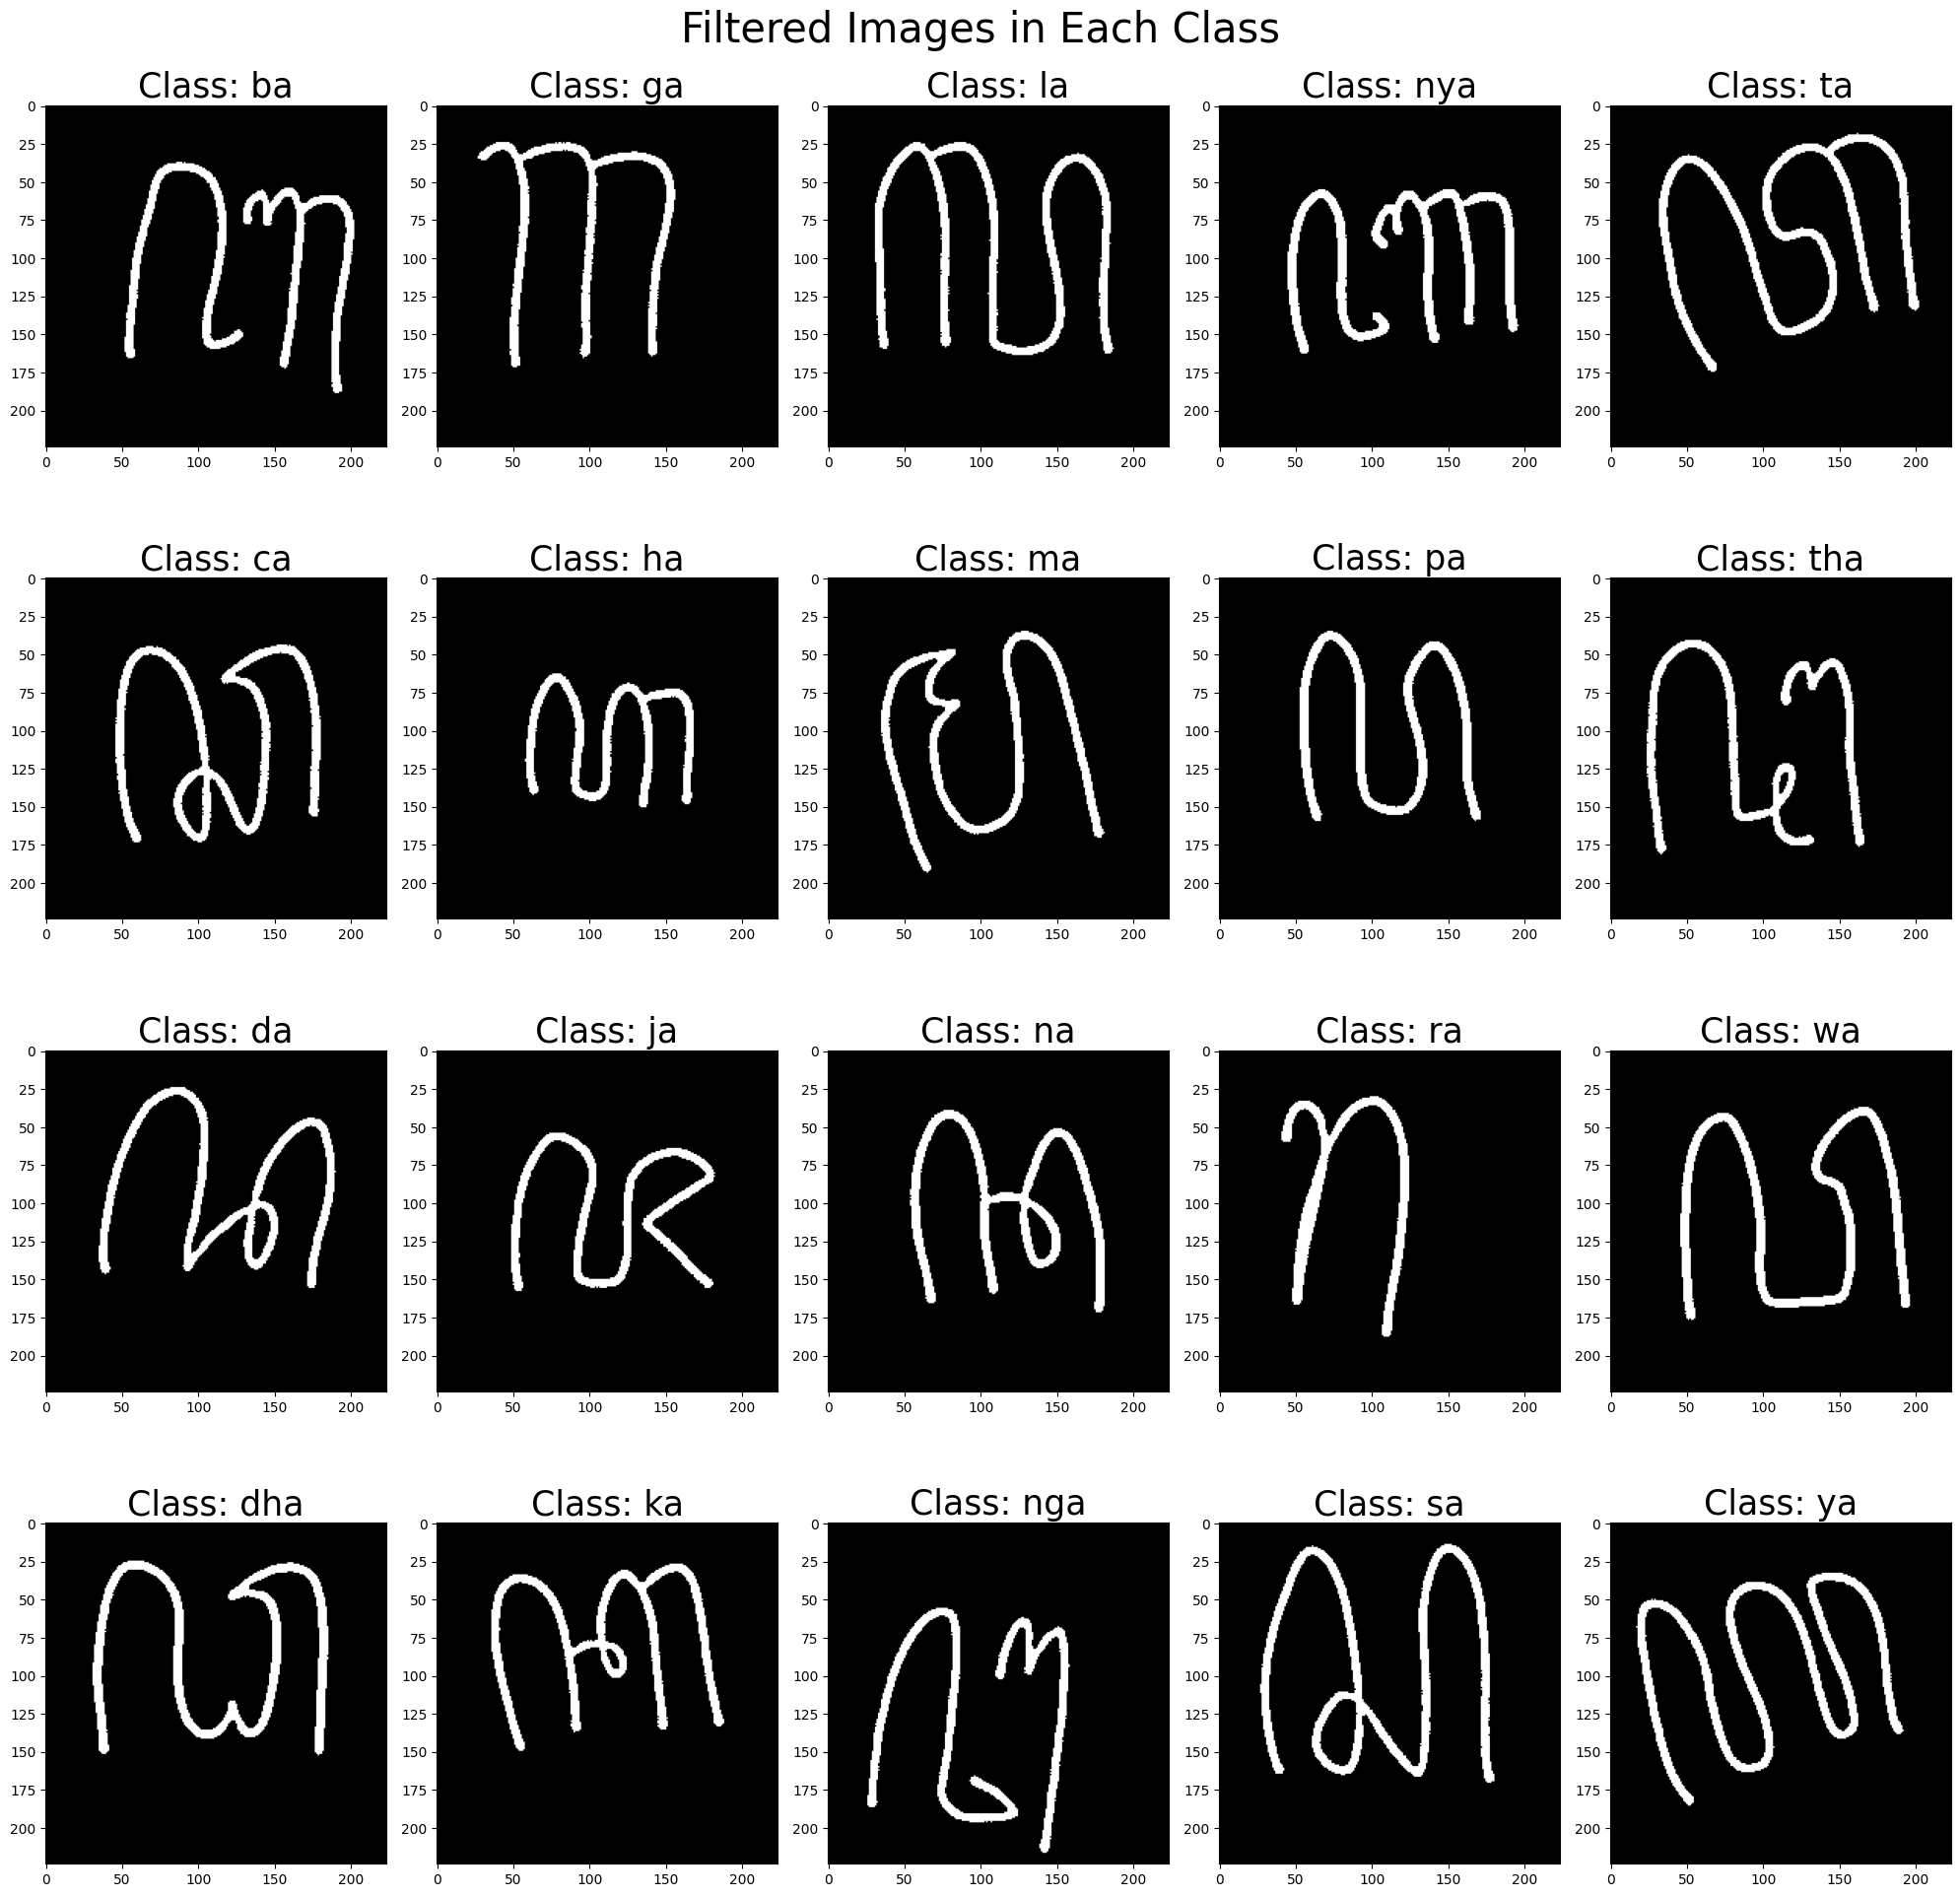

In [6]:
class ImageProcessor:
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path

    def display_random_image(self):
        # Inisialisasi plot
        fig, axes = plt.subplots(4, 5, figsize=(20, 20))

        # Iterasi melalui setiap subfolder
        for i, folder_name in enumerate(os.listdir(self.dataset_path)):
            folder_path = os.path.join(self.dataset_path, folder_name)

            # Pastikan yang diakses adalah subfolder
            if os.path.isdir(folder_path):

                # Mengambil satu gambar acak dari subfolder
                image_names = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
                random_image_name = random.choice(image_names)
                random_image_path = os.path.join(folder_path, random_image_name)

                # Membaca dan menampilkan gambar menggunakan Matplotlib
                random_image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
                axes[i % 4, i // 4].imshow(random_image, cmap='gray')
                axes[i % 4, i // 4].set_title(f"Class: {folder_name}", fontsize=25)
                axes[i % 4, i // 4].axis('on')
                
        # Menambahkan Title Class Visualization 
        plt.suptitle("Filtered Images in Each Class", fontsize=30)

        # Menampilkan plot
        plt.tight_layout()
        plt.show()

# Menentukan path ke folder dataset
dataset_path = output_img_filter

# Inisialisasi objek ImageProcessor dan panggil metode display_random_image
processor = ImageProcessor(dataset_path)
processor.display_random_image()

### Augmented Data

In [7]:
class ImageAugmentor:
    def __init__(self, dataset_dir, output_img_aug):
        self.dataset_dir = dataset_dir
        self.output_img_aug = output_img_aug

    def augment_images(self):
        datagen = ImageDataGenerator(
            rotation_range=19,
            shear_range=0.1,
            zoom_range=0.1,
            fill_mode='nearest'
        )

        # Membuat folder baru untuk menyimpan hasil augmentasi
        if not os.path.exists(self.output_img_aug):
            os.makedirs(self.output_img_aug)

        # Loop melalui setiap kelas dalam dataset
        for class_name in os.listdir(self.dataset_dir):
            class_path = os.path.join(self.dataset_dir, class_name)

            # Membuat folder baru untuk setiap kelas di dalam folder output
            output_class_path = os.path.join(self.output_img_aug, class_name)
            if not os.path.exists(output_class_path):
                os.makedirs(output_class_path)

            # Mendapatkan list file gambar di setiap kelas
            image_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if
                           file.endswith(('jpg', 'jpeg', 'png'))]

            # Loop melalui setiap file gambar dan augmentasi datanya
            for img_path in image_files:
                img = image.load_img(img_path, target_size=(96, 96))
                x = image.img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Proses augmented images
                i = 0
                for batch in datagen.flow(x, batch_size=32, save_to_dir=output_class_path,
                                          save_prefix=os.path.splitext(os.path.basename(img_path))[0] + '_aug',
                                          save_format='png'):
                    i += 1
                    if i >= 500:
                        break
                break

        print(f"Image Augmentation Complete!")

# Contoh penggunaan:
dataset_dir = output_img_filter
output_img_aug = '../data/data_preprocessing/v0.8/augmented/'

augmentor = ImageAugmentor(dataset_dir, output_img_aug)
augmentor.augment_images()

Image Augmentation Complete!


In [8]:
# Dictionary untuk menyimpan jumlah data di setiap kelas
kelas_data_count = {}

# Loop melalui setiap kelas di dalam folder output
for class_name in os.listdir(output_img_aug):
    class_path = os.path.join(output_img_aug, class_name)
    
    # Menghitung jumlah file gambar di setiap kelas
    num_images = len([file for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))])
    
    # Menyimpan jumlah data di setiap kelas ke dalam dictionary
    kelas_data_count[class_name] = num_images

# Menampilkan jumlah data di setiap kelas
for class_name, count in kelas_data_count.items():
    print(f"Kelas {class_name}: {count} gambar")

Kelas ba: 488 gambar
Kelas ca: 484 gambar
Kelas da: 490 gambar
Kelas dha: 490 gambar
Kelas ga: 489 gambar
Kelas ha: 488 gambar
Kelas ja: 484 gambar
Kelas ka: 493 gambar
Kelas la: 492 gambar
Kelas ma: 486 gambar
Kelas na: 489 gambar
Kelas nga: 484 gambar
Kelas nya: 487 gambar
Kelas pa: 493 gambar
Kelas ra: 489 gambar
Kelas sa: 485 gambar
Kelas ta: 485 gambar
Kelas tha: 486 gambar
Kelas wa: 487 gambar
Kelas ya: 491 gambar


### Imbalanced Dataset

In [9]:
# Path dataset
data = output_img_aug

# List kelas
kelas_aksara = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# Target jumlah gambar per kelas
target_jumlah = 493

# Loop untuk setiap kelas
for kelas in kelas_aksara:
    # Path kelas
    kelas_path = os.path.join(data, kelas)
    
    # Jumlah gambar saat ini
    jumlah_gambar = len(os.listdir(kelas_path))
    
    # Selisih gambar yang perlu ditambahkan
    selisih = target_jumlah - jumlah_gambar
    
    # Jika selisih positif, lakukan oversampling
    if selisih > 0:
        # Ambil sampel acak dari gambar yang sudah ada
        gambar_oversampling = random.sample(os.listdir(kelas_path), selisih)
        
        # Copy gambar oversampling ke dalam kelas
        for gambar in gambar_oversampling:
            source_path = os.path.join(kelas_path, gambar)
            
            # Generate sufiks acak
            sufiks_acak = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
            
            # Tentukan path tujuan dengan menambahkan sufiks acak
            target_path = os.path.join(kelas_path, f'{os.path.splitext(gambar)[0]}_{sufiks_acak}{os.path.splitext(gambar)[1]}')
            
            # Salin gambar ke target path
            shutil.copy(source_path, target_path)

# Cetak ulang jumlah gambar per kelas setelah penyamaan
for kelas in kelas_aksara:
    kelas_path = os.path.join(data, kelas)
    jumlah_gambar = len(os.listdir(kelas_path))
    print(f'Aksara {kelas} jumlah: {jumlah_gambar}')

Aksara ba jumlah: 493
Aksara ca jumlah: 493
Aksara da jumlah: 493
Aksara dha jumlah: 493
Aksara ga jumlah: 493
Aksara ha jumlah: 493
Aksara ja jumlah: 493
Aksara ka jumlah: 493
Aksara la jumlah: 493
Aksara ma jumlah: 493
Aksara na jumlah: 493
Aksara nga jumlah: 493
Aksara nya jumlah: 493
Aksara pa jumlah: 493
Aksara ra jumlah: 493
Aksara sa jumlah: 493
Aksara ta jumlah: 493
Aksara tha jumlah: 493
Aksara wa jumlah: 493
Aksara ya jumlah: 493


### Split Dataset

In [22]:
# Path ke direktori utama yang berisi sub-direktori untuk masing-masing kelas
main_data_dir = output_img_aug

# Path ke direktori output untuk train dan test set
path_dir = '../data/data_preprocessing/v0.7/data_split'

# Membuat sub-direktori train dan test
train_dir = os.path.join(path_dir, 'train')
test_dir = os.path.join(path_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop melalui masing-masing kelas (diasumsikan ada 20 kelas)
for class_name in os.listdir(main_data_dir):
    class_path = os.path.join(main_data_dir, class_name)
    
    # Mendapatkan list file untuk kelas tertentu
    files = os.listdir(class_path)
    
    # Membagi data menjadi train dan test set
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=50)
    
    # Membuat sub-direktori untuk masing-masing kelas di train dan test set
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Menyalin file ke dalam masing-masing sub-direktori
    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))
    
    for file in test_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(test_class_dir, file))

print("Data Splitting Completed !")

Data Splitting Completed !


In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path ke direktori utama yang berisi sub-direktori untuk masing-masing kelas
main_data_dir = '../data/data_preprocessing/v0.7/augmented'

# Path ke direktori output untuk train dan test set
path_dir = '../data/data_preprocessing/v0.7/data_split_a1'

# Membuat sub-direktori train dan test
train_dir = os.path.join(path_dir, 'train')
test_dir = os.path.join(path_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Mendefinisikan list untuk data dan label
X_train, X_test = [], []
y_train, y_test = [], []

# Loop melalui masing-masing kelas (diasumsikan ada 20 kelas)
for class_name in os.listdir(main_data_dir):
    class_path = os.path.join(main_data_dir, class_name)
    
    # Mendapatkan list file untuk kelas tertentu
    files = os.listdir(class_path)
    
    # Membagi data menjadi train dan test set
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=50)
    
    # Membuat sub-direktori untuk masing-masing kelas di train dan test set
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Menyalin file ke dalam masing-masing sub-direktori dan mengisi list data dan label
    for file in train_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))
        X_train.append(os.path.join(train_class_dir, file))
        y_train.append(class_name)
    
    for file in test_files:
        shutil.copy(os.path.join(class_path, file), os.path.join(test_class_dir, file))
        X_test.append(os.path.join(test_class_dir, file))
        y_test.append(class_name)

print("Data Splitting Completed !")

# Verifikasi output
print("Train data size:", len(X_train))
print("Test data size:", len(X_test))


Data Splitting Completed !
Train data size: 3160
Test data size: 792
